# DarshanUtils for Python

This notebook gives an overwiew of features provided by the Python bindings for DarshanUtils.

By default all records, metadata, available modules and the name records are loaded:

In [1]:
import darshan

report = darshan.DarshanReport("example.darshan", read_all=True)  # Default behavior
report.info()

dlopen ok
Filename:       example.darshan
Times:          2017-03-20 10:07:47 to 2017-03-20 10:09:43 (Duration 0:01:56)
Executeable:    /global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32
Processes:      2048
JobID:          4478544
UID:            69615
Modules in Log: ['POSIX', 'MPI-IO', 'LUSTRE', 'STDIO']
Loaded Records: {'POSIX': 1, 'MPI-IO': 1, 'STDIO': 129}
Name Records:   4
Darshan/Hints:  {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(140160358490464) (tmp)


In [2]:
report.modules

{'POSIX': {'len': 186, 'ver': 3, 'idx': 1, 'num_records': 1},
 'MPI-IO': {'len': 154, 'ver': 2, 'idx': 2, 'num_records': 1},
 'LUSTRE': {'len': 87, 'ver': 1, 'idx': 7},
 'STDIO': {'len': 3234, 'ver': 1, 'idx': 8, 'num_records': 129}}

A few of the internal data structures explained:

In [3]:
# report.metadata         # dictionary with raw metadata from darshan log
# report.modules          # dictionary with raw module info from darshan log (need: technical, module idx)
# report.name_records     # dictionary for resovling name records: id -> path/name
# report.records          # per module "dataframes"/dictionaries holding loaded records

The darshan report holds a variety of namespaces for report related data. All of them are also referenced in `report.data` at the moment, but reliance on this internal organization of the report object is discouraged once the API stabilized. Currently, `report.data` references the following information:

In [1]:
report.data.keys()

NameError: name 'report' is not defined

In [13]:
report.mod_read_all_records('POSIX')

In [16]:
report.mod_read_all_records('STDIO')

In [4]:
report.update_name_records()
report.info()

MPI-IO
Filename:       _2k_248.darshan
Times:          2020-06-21 21:34:17 to 2020-06-21 21:42:18 (Duration 0:08:01)
Executeable:    ./nfiles 2048 
Processes:      248
JobID:          30805
UID:            1000
Modules in Log: ['POSIX', 'MPI-IO', 'STDIO']
Loaded Records: {'MPI-IO': 253952}
Name Records:   253952
Darshan/Hints:  {'lib_ver': '3.2.0', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(140543143182576) (tmp)


In [1]:
from IPython.display import display, HTML
# use: display(obj)

In [3]:
recs

NameError: name 'recs' is not defined

### Selectively Loading Records

For memory efficiant analysis, it is possible to supress records from being loaded automatically. This is useful, for example, when analysis only considers a particular layer.

In [5]:
report = darshan.DarshanReport("example.darshan", read_all=False) # Loads no records!

In [6]:
# expected to fail, as no records were loaded
try:
    print(len(report.records['STDIO']), "records loaded for STDIO.")
except:
    print("No STDIO records loaded for this report yet.")

No STDIO records loaded for this report yet.


Additional records then can be loaded selectively, for example, on a per module basis:

In [7]:
report.mod_read_all_records("STDIO") 

In [8]:
len(report.records['STDIO'])

129

In [10]:
report.info()

Filename:       example.darshan
Times:          2017-03-20 10:07:47 to 2017-03-20 10:09:43 (Duration 0:01:56)
Executeable:    /global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32
Processes:      2048
JobID:          4478544
UID:            69615
Modules in Log: ['POSIX', 'MPI-IO', 'LUSTRE', 'STDIO']
Loaded Records: {'STDIO': 129}
Name Records:   4
Darshan/Hints:  {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}
DarshanReport:  id(139750934822192) (tmp)


In [13]:
report.records['STDIO'][0]

{'id': 15920181672442173319,
 'rank': 0,
 'counters': array([                   1, 18446744073709551615,                    0,
                           6,                    0,                    0,
                         280,                    0,                    0,
                         279,                    0,                    0,
                           0], dtype=uint64),
 'fcounters': array([  1.,  -1.,   0.,   6.,   0.,   0., 280.,   0.,   0., 279.,   0.,
          0.,   0.])}

### Aggregation and Filtering (Experimental)

Darshan log data is routinely aggregated for quick overview. The report object offers a few methods to perform common aggregations:

Report aggregations and summarization remains **experimental** for now, mostly to allow interfaces to stabilize. But experimental features can be switched on easily by invoking `darshan.enable_experimental()`:

In [22]:
import darshan
darshan.enable_experimental(verbose=True) # Enable verbosity, listing new functionality

Added method create_time_summary to DarshanReport.
Added method print_module_records to DarshanReport.
Added method summarize to DarshanReport.
Added method merge to DarshanReport.
Added method create_timeline to DarshanReport.
Added method records_as_dict to DarshanReport.
Added method reduce to DarshanReport.
Added method agg_ioops to DarshanReport.
Added method create_sankey to DarshanReport.
Added method filter to DarshanReport.
Added method mod_agg_iohist to DarshanReport.
Added method name_records_summary to DarshanReport.


In [25]:
# Example report, which counts records in log across modules 
report.name_records_summary()

{6301063301082038805: {'name': '/scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5',
  'counts': {'POSIX': 1, 'MPI-IO': 1}},
 15920181672442173319: {'name': '<STDOUT>', 'counts': {'STDIO': 1}},
 7238257241479193519: {'name': '<STDERR>', 'counts': {'STDIO': 128}}}

### Chain operations like filtering and reductions
The filter and reduce operations return DarshanReports themsleves, thus allow to convieniently chain operations.

In [26]:
import pprint

import darshan
darshan.enable_experimental()

report = darshan.DarshanReport("example.darshan", read_all=True)
report.name_records

{14734109647742566553: '<STDIN>',
 15920181672442173319: '<STDOUT>',
 7238257241479193519: '<STDERR>',
 6301063301082038805: '/scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5'}

In [29]:
report.filter(name_records=[6301063301082038805, 15920181672442173319]).records

{'POSIX': [{'id': 6301063301082038805,
   'rank': -1,
   'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                             0,                16402,                16404,
                             0,                    0,                    0,
                             0, 18446744073709551615, 18446744073709551615,
                             0,                    0,                    0,
                 2199023259968,                    0,        2199023261831,
                             0,                    0,                    0,
                         16384,                    0,                    0,
                             8,                16401,              1048576,
                             0,            134217728,                    0,
                             0,                    0,                    0,
                             0,                    0,                    0,
                      

In [30]:
# reduce all after filtering
report.filter(pattern="*.hdf5").reduce().records

{'POSIX': [{'id': '*',
   'rank': -1,
   'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                             0,                16402,                16404,
                             0,                    0,                    0,
                             0, 18446744073709551615, 18446744073709551615,
                             0,                    0,                    0,
                 2199023259968,                    0,        2199023261831,
                             0,                    0,                    0,
                         16384,                    0,                    0,
                             8,                16401,              1048576,
                             0,            134217728,                    0,
                             0,                    0,                    0,
                             0,                    0,                    0,
                             0,       

In [31]:
# only preserve some
report.filter(name_records=[6301063301082038805]).reduce(mods=['POSIX', 'STDIO']).records

{'POSIX': [{'id': '*',
   'rank': -1,
   'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                             0,                16402,                16404,
                             0,                    0,                    0,
                             0, 18446744073709551615, 18446744073709551615,
                             0,                    0,                    0,
                 2199023259968,                    0,        2199023261831,
                             0,                    0,                    0,
                         16384,                    0,                    0,
                             8,                16401,              1048576,
                             0,            134217728,                    0,
                             0,                    0,                    0,
                             0,                    0,                    0,
                             0,       

In [ ]:
# expected to fail
try:
    pprint.pprint(report.summary['agg_ioops'])
except:
    print("IOOPS have not been aggregated for this report.")

In [ ]:
report.read_all() 
report.summarize()

In [ ]:
report.summary['agg_ioops']

Or fine grained:

In [ ]:
report.mod_agg_iohist("MPI-IO")  # to create the histograms

In [ ]:
report.agg_ioops()               # to create the combined operation type summary

### Report Algebra (Experimental)

Various operations are implemented to merge, combine and manipulate log records. This is useful for analysis task, but can also be used to construct performance projections or extrapolation.

For convienience, we overload some of the operations provided by Python when they resemble intuitive equivalence to their mathematical counterparts. In particular, we enable the combination of different object types.

Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,16402,2049,0,16404,0,0,POSIX
0,18,0,0,0,0,0,MPIIND
0,16384,2048,0,0,0,0,MPICOL
0,74,129,0,0,0,0,STDIO



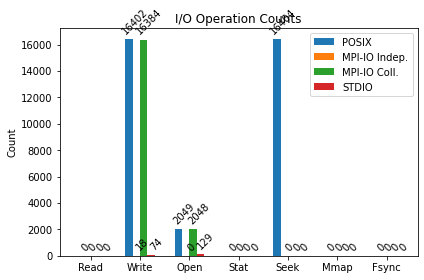

Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,16402,2049,0,16404,0,0,POSIX
0,18,0,0,0,0,0,MPIIND
0,16384,2048,0,0,0,0,MPICOL
0,74,129,0,0,0,0,STDIO



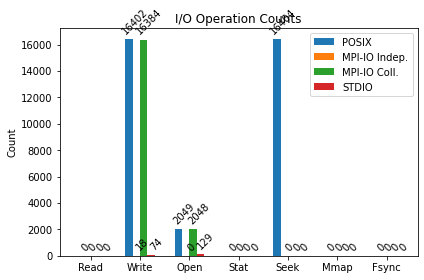

Summarizing... agg_ioops
Read,Write,Open,Stat,Seek,Mmap,Fsync,Layer
0,32804,4098,0,32808,0,0,POSIX
0,36,0,0,0,0,0,MPIIND
0,32768,4096,0,0,0,0,MPICOL
0,148,258,0,0,0,0,STDIO



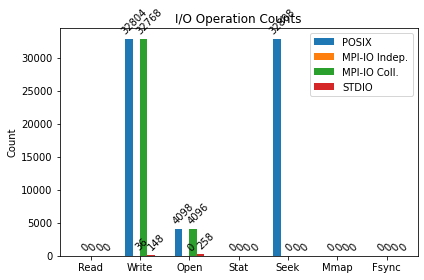

In [33]:
# merging records
from darshan.experimental.plots.matplotlib import plot_access_histogram
from darshan.experimental.plots.matplotlib import plot_opcounts

r1 = darshan.DarshanReport("example.darshan", read_all=True)
r2 = darshan.DarshanReport("example2.darshan", read_all=True)
rx = r1 + r2

for r in [r1, r2, rx]:
    plt = plot_opcounts(r)
    plt.show()

In [ ]:
# multiply records with a scalar (think, four times the I/O load)
#r1 = darshan.DarshanReport("example.darshan", read_all=True)
#rx = r1 * 4
#plot_opcounts(rx)

In [ ]:
# rebase via timedelta
#r1 = darshan.DarshanReport("example.darshan", read_all=True)
#dt = datetime.timedelta()
#rx = r1 + dt

## Plotting

Summarizing... iohist POSIX


<module 'matplotlib.pyplot' from '/home/pq/ANL/darshan-decaf/testbed/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

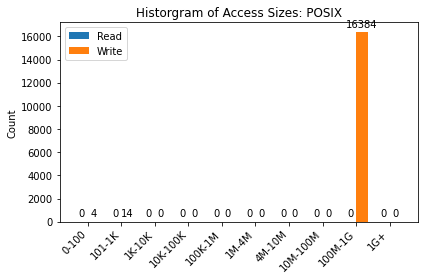

In [32]:
import darshan
darshan.enable_experimental(verbose=False)

r3 = darshan.DarshanReport("example.darshan")
r3.mod_read_all_records('POSIX')

from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(r3, mod='POSIX')

In [ ]:
import darshan
darshan.enable_experimental(verbose=False)

r3 = darshan.DarshanReport("example.darshan")
r3.mod_read_all_records('MPI-IO')

from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(r3, mod='MPI-IO')

In [ ]:
import darshan
darshan.enable_experimental(verbose=False)

r3 = darshan.DarshanReport("example.darshan")
r3.read_all()

from darshan.experimental.plots.matplotlib import plot_opcounts
plot_opcounts(r3)

### DXT Records

DXT records are also supported, and can be loaded individually on a per module basis as follows:


In [ ]:
report2 = darshan.DarshanReport("example.darshan")
report2.mod_read_all_dxt_records("ABC") 

In [ ]:
report2.data

## Exporting Data for Use in Third-Party Analysis

Darshan logs may be used in contexts beyond our imagination. To make this effortless export in JSON is easy.

In [ ]:
import darshan
report = darshan.DarshanReport("example.darshan", read_all=True)
report.to_json()

## Error Handling?

Currently, playing with two modes, both have their pros and cons.

Generally, should expose errors and let users handle them. At the same time, just skipping invalid load requests does little harm but greatly improves convienince.

Could add a switch to enable disable these guard :/

In [ ]:
report = darshan.DarshanReport("example.darshan")

In [ ]:
report.mod_read_all_records("ABC") # Expect KeyError

In [ ]:
report.mod_read_all_dxt_records("ABC") # Expect printed warning, but not exception